In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

RESULTS_DIR = "/home/samuel/Documents/Actor-Expert/RLControl/results"
EXPERIMENT_DIR = "Pendulum-v0results"
NUM_RUNS = 10
RESULTS_FILES = [f"Pendulum-v0_ReverseKL_setting_0_run_{run}_EvalEpisodeMeanRewardsLC.txt" for run in range(NUM_RUNS)]

In [2]:
results_files = [os.path.join(RESULTS_DIR, EXPERIMENT_DIR, results_file) for results_file in RESULTS_FILES]
all_results = []

for data_file in results_files:
    with open(data_file) as data_file:
        results = data_file.read().split(" ")

    # Remove commas
    results = list(map(lambda x: x.rstrip(","), results))

    # Remove empty strings
    results = list(filter(lambda x: x != "", results))

    # Set to floats
    results = list(map(lambda x: float(x), results))

    all_results.append(results)

all_results = np.array(all_results)
mean_all_results = all_results.mean(axis=0)
std_dev_all_results = np.std(all_results, axis=0)

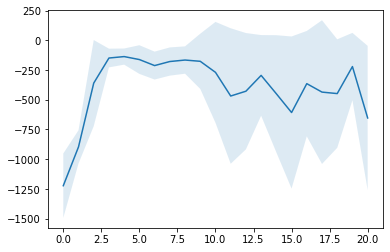

In [3]:
fig = plt.figure()
ax = fig.add_subplot()

x = np.arange(0, mean_all_results.shape[0])
ax.fill_between(x, mean_all_results - std_dev_all_results, mean_all_results + std_dev_all_results, alpha=0.15)
ax.plot(x, mean_all_results)